# Instructions

The places where you have enter code, to answer the questions, are marked with `# YOUR CODE HERE`.

## Question 1 (6 points)

Given the following QUBO, complete the function `create_bqm` so that it returns the corresponding BQM.

$$- 7x_1 - 2x_2 - 10x_3 - 4x_4 + 5x_1x_2 + 3x_1x_3 + 6x_2x_3 - 8x_3x_4 - 2$$


The function `create_bqm` has

- Input: None
- Returns:
    - A BQM instance


In [2]:
pip install dimod


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.7/18.7 MB 39.1 MB/s eta 0:00:00


In [5]:
from dimod import BinaryQuadraticModel

def create_bqm():
   # Define the linear coefficients
    linear = {'x1': -7, 'x2': -2, 'x3': -10, 'x4': -4}

    # Define the quadratic coefficients
    quadratic = {('x1', 'x2'): 5, ('x1', 'x3'): 3, ('x2', 'x3'): 6, ('x3', 'x4'): -8}

    # Define the offset
    offset = -2

    # Create the BQM
    bqm = BinaryQuadraticModel(linear, quadratic, offset, vartype='BINARY')
    # Do not modify anything below this line
    return bqm

In [6]:
# You can use this cell to call and check the output of the function

print(create_bqm())

BinaryQuadraticModel({'x1': -7.0, 'x2': -2.0, 'x3': -10.0, 'x4': -4.0}, {('x2', 'x1'): 5.0, ('x3', 'x1'): 3.0, ('x3', 'x2'): 6.0, ('x4', 'x3'): -8.0}, -2.0, 'BINARY')


In [ ]:
# hidden tests will be used for grading.

## Question 2 (6 points)

Function `solve_Q` takes as input a matrix representation of a QUBO formulation. Complete the function `solve_Q` so that it returns the solution to the given problem. Use D-Wave's `ExactSolver()`.


The function `solve_Q` has

- Input:
    - Q matrix representation of QUBO as an `numpy.array`.
- Returns:
    - Sample with the lowest energy (first sample of the SampleSet)


In [7]:
from dimod import BQM


def solve_Q(Q):
    num_vars = Q.shape[0]
    linear = {i: Q[i, i] for i in range(num_vars)}
    quadratic = {(i, j): Q[i, j] for i in range(num_vars) for j in range(i + 1, num_vars)}

    bqm = BinaryQuadraticModel(linear, quadratic, 0.0, vartype='BINARY')

    # Use ExactSolver to solve the BQM
    solver = ExactSolver()
    sampleset = solver.sample(bqm)
    # Do not modify anything below this line
    return sampleset.first

In [8]:
# You can use this cell to call and check the output of the function
import numpy as np
from dimod.reference.samplers import ExactSolver


Q = np.array([[1, 1], [0, 1]])
print(solve_Q(Q))

Sample(sample={0: 0, 1: 0}, energy=0.0, num_occurrences=1)


In [ ]:
# hidden tests will be used for grading.

## Question 3 (6 points)

You are given a graph $G$ in the next cell where the nodes are labeled $0,1,\dots,8$. Create a BQM with `SPIN` variables to solve Max-Cut problem for the given graph. Variables should be named with the name of the correspoding node.

The function `max_cut` has

- Input: None
- Returns:
    - BQM with SPIN variables for graph `G`


EdgeView([(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8)])

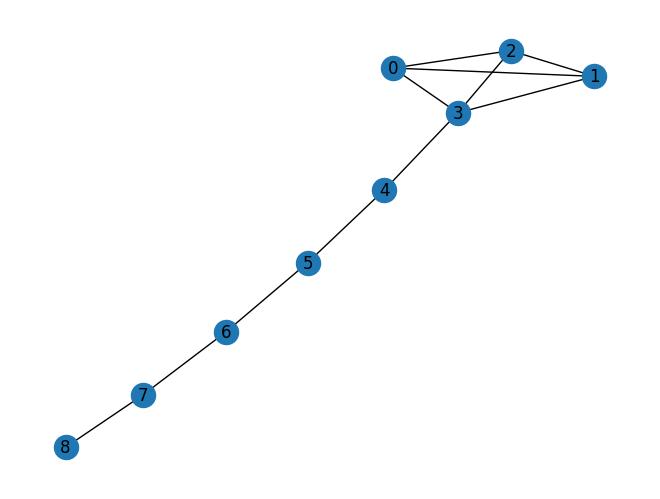

In [3]:
import networkx as nx

G = nx.lollipop_graph(4, 5)
nx.draw(G, with_labels=True)
G.edges

In [6]:
from dimod import BQM


def max_cut():
    G = nx.Graph()
    G.add_edges_from([(0, 1), (0, 2), (0, 3), (1, 4), (1, 5), (2, 6), (3, 7), (4, 8)])

    # Create an empty BQM with SPIN variables
    bqm = BQM(vartype='SPIN')

    # Add quadratic terms for each edge in the graph
    for u, v in G.edges():
        bqm.add_interaction(u, v, 1)  # Each edge contributes a term to the BQM

    # Do not modify anything below this line
    return bqm

In [7]:
# You can use this cell to call and check the output of the function
print(max_cut())

BinaryQuadraticModel({0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0, 8: 0.0}, {(1, 0): 1.0, (2, 0): 1.0, (3, 0): 1.0, (4, 1): 1.0, (5, 1): 1.0, (6, 2): 1.0, (7, 3): 1.0, (8, 4): 1.0}, 0.0, 'SPIN')


In [ ]:
# hidden tests will be used for grading.
# If this cell results in an error, your implementation is incorrect